
# Indução de Agentes - Algoritmos e Modelos de Decisão

Este notebook cobre o desenvolvimento e treinamento de agentes para tarefas específicas, 
utilizando técnicas de aprendizado supervisionado e análise de decisão.

## Conteúdos:
1. Implementação de Algoritmos de Decisão
2. Treinamento e Avaliação de Modelos de Agentes
3. Análise dos Resultados e Ajuste de Parâmetros


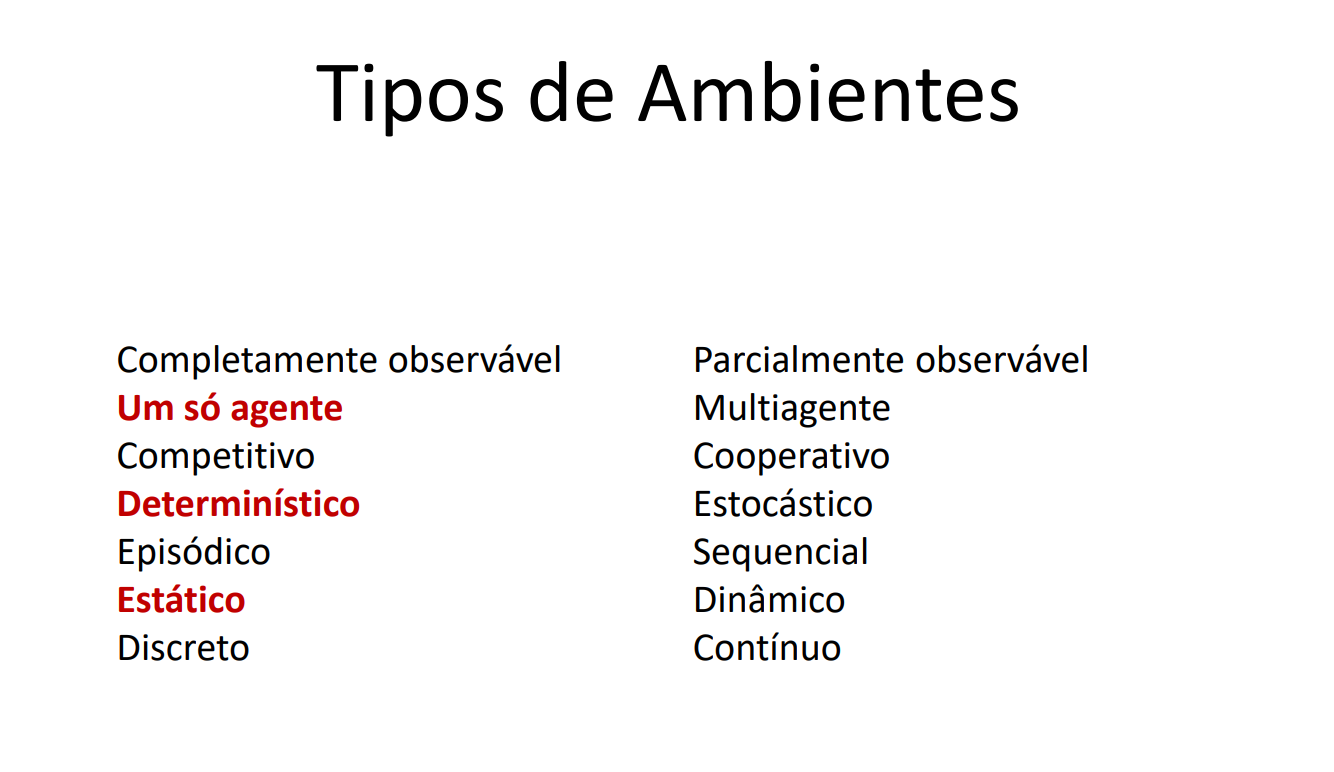

In [1]:
class SimpleAgent:
    def __init__(self, environment):
        self.environment = environment

    def act(self):
        for i in range(len(self.environment)):
            if self.environment[i] == 1:
                self.environment[i] = 0
        return self.environment

# Ambiente: 1 representa sujeira, 0 representa limpo
# environment = [1, 0, 1, 1, 0];
environment = [1, 1, 1, 1, 1]
agent = SimpleAgent(environment)
print("Ambiente antes:", environment)
print("Ambiente depois:", agent.act())


Ambiente antes: [1, 1, 1, 1, 1]
Ambiente depois: [0, 0, 0, 0, 0]


In [ ]:
import random
import numpy as np

class AgenteAprendizagem:
    def __init__(self, acoes, alfa=0.1, gama=0.9, epsilon=0.1):
        self.tabela_q = {}  # Tabela Q-Learning para armazenar os valores Q
        self.acoes = acoes  # Lista de ações possíveis
        self.alfa = alfa  # Taxa de aprendizagem
        self.gama = gama  # Fator de desconto
        self.epsilon = epsilon  # Taxa de exploração

    def escolher_acao(self, estado):
        # Inicializa a tabela Q para o estado se ele não existir
        if estado not in self.tabela_q:
            self.tabela_q[estado] = [0] * len(self.acoes)
        # Escolhe uma ação baseada na política ε-greedy
        if random.uniform(0, 1) < self.epsilon:
            return random.choice(self.acoes)  # Exploração
        else:
            return self.acoes[np.argmax(self.tabela_q[estado])]  # Exploração

    def aprender(self, estado, acao, recompensa, proximo_estado):
        # Inicializa a tabela Q para os estados se não existirem
        if estado not in self.tabela_q:
            self.tabela_q[estado] = [0] * len(self.acoes)
        if proximo_estado not in self.tabela_q:
            self.tabela_q[proximo_estado] = [0] * len(self.acoes)
        # Atualiza o valor Q
        q_atualizado = recompensa + self.gama * max(self.tabela_q[proximo_estado])
        self.tabela_q[estado][acao] = self.alfa * q_atualizado + (1 - self.alfa) * self.tabela_q[estado][acao]

def obter_proximo_estado(estado, acao):
    if acao == 0:  # Cima
        return (estado[0] - 1, estado[1])
    elif acao == 1:  # Baixo
        return (estado[0] + 1, estado[1])
    elif acao == 2:  # Esquerda
        return (estado[0], estado[1] - 1)
    elif acao == 3:  # Direita
        return (estado[0], estado[1] + 1)

def estado_valido(labirinto, estado):
    linhas, colunas = len(labirinto), len(labirinto[0])
    return 0 <= estado[0] < linhas and 0 <= estado[1] < colunas and labirinto[estado[0]][estado[1]] == 0

def imprimir_labirinto(labirinto, posicao_agente, posicao_objetivo):
    copia_labirinto = [linha[:] for linha in labirinto]
    copia_labirinto[posicao_agente[0]][posicao_agente[1]] = 'A'  # Posição do agente
    copia_labirinto[posicao_objetivo[0]][posicao_objetivo[1]] = 'G'  # Posição do objetivo
    for linha in copia_labirinto:
        print(' '.join(str(celula) for celula in linha))
    print()

# Definindo o labirinto (0: caminho livre, 1: parede)
labirinto = [
    [0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0]
]

# Definindo ações possíveis
acoes = [0, 1, 2, 3]  # 0: cima, 1: baixo, 2: esquerda, 3: direita
agente = AgenteAprendizagem(acoes)

# Estado inicial e estado final
estado_inicial = (0, 0)
estado_final = (4, 4)

# Simulando aprendizagem
for episodio in range(1000):
    estado = estado_inicial
    while estado != estado_final:
        acao = agente.escolher_acao(estado)
        proximo_estado = obter_proximo_estado(estado, acao)
        if estado_valido(labirinto, proximo_estado):
            recompensa = 1 if proximo_estado == estado_final else -0.1
            agente.aprender(estado, acao, recompensa, proximo_estado)
            estado = proximo_estado
        else:
            recompensa = -1
            agente.aprender(estado, acao, recompensa, estado)

# Testando o agente
estado = estado_inicial
caminho = [estado]
print("Caminho encontrado pelo agente:")
while estado != estado_final:
    imprimir_labirinto(labirinto, estado, estado_final)
    acao = agente.escolher_acao(estado)
    proximo_estado = obter_proximo_estado(estado, acao)
    if estado_valido(labirinto, proximo_estado):
        caminho.append(proximo_estado)
        estado = proximo_estado
    else:
        break
imprimir_labirinto(labirinto, estado, estado_final)

# Imprimindo o caminho encontrado pelo agente
print("Caminho encontrado pelo agente:", caminho)


Caminho encontrado pelo agente:
A 1 0 0 0
0 1 0 1 0
0 0 0 1 0
0 1 1 1 0
0 0 0 0 G

0 1 0 0 0
A 1 0 1 0
0 0 0 1 0
0 1 1 1 0
0 0 0 0 G

0 1 0 0 0
0 1 0 1 0
A 0 0 1 0
0 1 1 1 0
0 0 0 0 G

0 1 0 0 0
0 1 0 1 0
0 0 0 1 0
A 1 1 1 0
0 0 0 0 G

0 1 0 0 0
0 1 0 1 0
0 0 0 1 0
0 1 1 1 0
A 0 0 0 G

0 1 0 0 0
0 1 0 1 0
0 0 0 1 0
0 1 1 1 0
0 A 0 0 G

0 1 0 0 0
0 1 0 1 0
0 0 0 1 0
0 1 1 1 0
0 A 0 0 G

Caminho encontrado pelo agente: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1)]


In [ ]:
# Outro labirinto
labirinto2 = [
    [0, 1, 1, 1, 0],
    [0, 0, 0, 1, 0],
    [1, 1, 0, 0, 0],
    [0, 0, 1, 0, 1],
    [0, 0, 0, 0, 0]
]

estado_inicial2 = (0, 0)
estado_final2 = (4, 4)

agente3 = AgenteAprendizagem(acoes)

# Simulando aprendizagem no outro labirinto
for episodio in range(1000):
    estado = estado_inicial2
    while estado != estado_final2:
        acao = agente3.escolher_acao(estado)
        proximo_estado = obter_proximo_estado(estado, acao)
        if estado_valido(labirinto2, proximo_estado):
            recompensa = 1 if proximo_estado == estado_final2 else -0.1
            agente3.aprender(estado, acao, recompensa, proximo_estado)
            estado = proximo_estado
        else:
            recompensa = -1
            agente3.aprender(estado, acao, recompensa, estado)

# Testando o agente no outro labirinto
estado = estado_inicial2
caminho = [estado]
print("Caminho encontrado pelo agente no outro labirinto:")
while estado != estado_final2:
    imprimir_labirinto(labirinto2, estado, estado_final2)
    acao = agente3.escolher_acao(estado)
    proximo_estado = obter_proximo_estado(estado, acao)
    if estado_valido(labirinto2, proximo_estado):
        caminho.append(proximo_estado)
        estado = proximo_estado
    else:
        break
imprimir_labirinto(labirinto2, estado, estado_final2)

# Imprimindo o caminho encontrado pelo agente no outro labirinto
print("Caminho encontrado pelo agente no outro labirinto:", caminho)


Caminho encontrado pelo agente no outro labirinto:
A 1 1 1 0
0 0 0 1 0
1 1 0 0 0
0 0 1 0 1
0 0 0 0 G

0 1 1 1 0
A 0 0 1 0
1 1 0 0 0
0 0 1 0 1
0 0 0 0 G

0 1 1 1 0
0 A 0 1 0
1 1 0 0 0
0 0 1 0 1
0 0 0 0 G

0 1 1 1 0
0 0 A 1 0
1 1 0 0 0
0 0 1 0 1
0 0 0 0 G

0 1 1 1 0
0 0 0 1 0
1 1 A 0 0
0 0 1 0 1
0 0 0 0 G

0 1 1 1 0
0 0 0 1 0
1 1 0 A 0
0 0 1 0 1
0 0 0 0 G

0 1 1 1 0
0 0 0 1 0
1 1 0 0 0
0 0 1 A 1
0 0 0 0 G

0 1 1 1 0
0 0 0 1 0
1 1 0 0 0
0 0 1 0 1
0 0 0 A G

0 1 1 1 0
0 0 0 1 0
1 1 0 0 0
0 0 1 0 1
0 0 0 0 G

Caminho encontrado pelo agente no outro labirinto: [(0, 0), (1, 0), (1, 1), (1, 2), (2, 2), (2, 3), (3, 3), (4, 3), (4, 4)]
